In [0]:
!git clone https://github.com/rslim087a/track

fatal: destination path 'track' already exists and is not an empty directory.


In [0]:
!ls

model.h5  sample_data  track


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Convolution2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import csv
import pandas as pd
import ntpath
import random
from collections import OrderedDict
from imgaug import augmenters as iaa

In [0]:
#making columns for our input csv file(these header might not be there in csv file)
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(('track//driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)   # to show full file path isntead of ...
data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_382.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


In [0]:
def getOnlyImageName(path):
  head, tail = ntpath.split(path)
  return tail

data['center'] = data['center'].apply(getOnlyImageName)
data['left'] = data['left'].apply(getOnlyImageName)
data['right'] = data['right'].apply(getOnlyImageName)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2018_07_16_17_11_43_382.jpg,left_2018_07_16_17_11_43_382.jpg,right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,center_2018_07_16_17_11_43_670.jpg,left_2018_07_16_17_11_43_670.jpg,right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,center_2018_07_16_17_11_43_724.jpg,left_2018_07_16_17_11_43_724.jpg,right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,center_2018_07_16_17_11_43_792.jpg,left_2018_07_16_17_11_43_792.jpg,right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,center_2018_07_16_17_11_43_860.jpg,left_2018_07_16_17_11_43_860.jpg,right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


[1.07944732e-01 1.85048113e-02 1.85048113e-02 1.85048113e-02
 4.00937577e-02 2.46730817e-02 7.40192450e-02 6.78509746e-02
 1.63459166e-01 4.04021712e-01 3.05329386e-01 4.87293363e-01
 9.22156427e+00 4.22526524e-01 2.65235628e-01 3.88601036e-01
 1.66543301e-01 6.78509746e-02 5.85985690e-02 6.16827042e-03
 2.77572169e-02 1.23365408e-02 1.23365408e-02 1.85048113e-02
 1.01776462e-01]


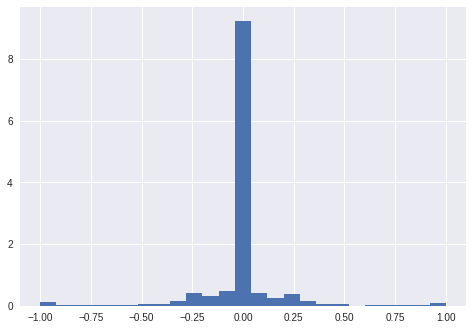

In [0]:
(n, bins, patches)=plt.hist(data['steering'], density=True, bins=25)

print(n)

In [0]:
#getting count of all the steering angles
angleCount={} 
  
for i in range(len(data['steering'])):
  current_angle=data['steering'][i]
  if current_angle in angleCount:
    angleCount[current_angle] = angleCount[current_angle]+1
  else:
    angleCount[current_angle] = 1

#sorting in desc order
sortedAngleCount=OrderedDict(sorted(angleCount.items(), key=lambda x: x[1], reverse=True))

print(sortedAngleCount)

OrderedDict([(0.0, 2927), (-0.05, 57), (0.1, 48), (0.2, 46), (-0.2, 44), (-0.15, 40), (0.05, 38), (-0.1, 37), (-0.25, 34), (1.0, 32), (-1.0, 32), (0.25, 31), (0.15, 29), (-0.3, 19), (0.3, 16), (-0.45, 9), (0.35, 9), (-0.35, 8), (0.45, 8), (-0.5000001000000001, 6), (-0.4, 5), (0.4, 5), (-0.6500001, 3), (-0.6000001, 3), (0.6000001, 3), (-0.7500001999999999, 2), (-0.8500001, 2), (-0.5500001, 2), (0.7, 2), (0.5000001000000001, 2), (0.8500001, 2), (-0.8000001, 2), (0.6500001, 2), (0.8000001, 2), (-0.5354305, 1), (-0.43196190000000007, 1), (-0.19095710000000002, 1), (-0.006139816, 1), (-0.4176539000000001, 1), (-0.148133, 1), (-0.2039619, 1), (-0.2899932, 1), (-0.04874708, 1), (-0.1987471, 1), (-0.39874709999999997, 1), (-0.5835459, 1), (-0.33470059999999996, 1), (-0.09781816, 1), (-0.8377869000000001, 1), (-0.570669, 1), (-0.371641, 1), (-0.11844180000000001, 1), (0.03825914, 1), (0.2382591, 1), (0.3882592, 1), (0.4069337, 1), (0.22462390000000002, 1), (0.03269759, 1), (-0.407143, 1), (-0.2

In [0]:
#we need to remove all the steering angles lying in bin of 0.0 as their frequency is too high. it will add data bias to 0.0

#original count
print("Original Count {0}".format(len(data['steering'])))

remove_list = []
list_ = []

for i in range(len(data['steering'])):
    if data['steering'][i] == 0.0:   #removing streeing angle 0.0
      list_.append(i)

list_ = shuffle(list_)
list_ = list_[350:]
remove_list.extend(list_)

#removing from original data
data.drop(data.index[remove_list], inplace=True)

#after removal count
print("Removed Count {0}".format(len(remove_list)))
print("After Removal Count {0}".format(len(data['steering'])))

Original Count 4053
Removed Count 2577
After Removal Count 1476


(array([0.29640921, 0.05081301, 0.05081301, 0.05081301, 0.11009485,
        0.06775068, 0.20325203, 0.18631436, 0.44884824, 1.10941734,
        0.83841463, 1.33807588, 3.49762873, 1.16023035, 0.72831978,
        1.06707317, 0.45731707, 0.18631436, 0.16090786, 0.01693767,
        0.07621951, 0.03387534, 0.03387534, 0.05081301, 0.27947154]),
 array([-1.  , -0.92, -0.84, -0.76, -0.68, -0.6 , -0.52, -0.44, -0.36,
        -0.28, -0.2 , -0.12, -0.04,  0.04,  0.12,  0.2 ,  0.28,  0.36,
         0.44,  0.52,  0.6 ,  0.68,  0.76,  0.84,  0.92,  1.  ]),
 <a list of 25 Patch objects>)

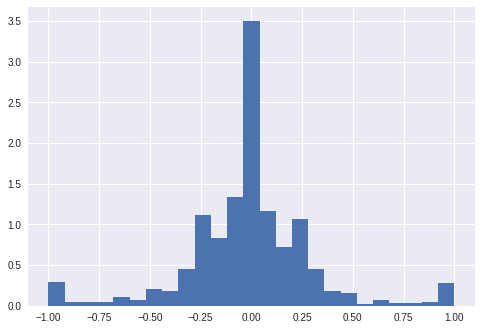

In [0]:
plt.hist(data['steering'], density=True, bins=25)

In [0]:
#see how iloc shows our data
print(data.iloc[1])

#get only the image name and center steering data.remove others
def get_only_center_image_and_steering_data(input_data):
  image_path =[] #will hold center image name
  steering =[] #will hold steering angles
  
  for i in range(len(data)):
    current_data = data.iloc[i]   # get row at index i
    
    image_path.append(current_data[0])
    steering.append(float(current_data[3]))
    
  image_paths = np.asarray(image_path)
  steerings = np.asarray(steering)
  
  return image_paths, steerings

center      center_2018_07_16_17_11_44_413.jpg
left        left_2018_07_16_17_11_44_413.jpg  
right       right_2018_07_16_17_11_44_413.jpg 
steering   -0.05                              
throttle    0.642727                          
reverse     0                                 
speed       1.43401                           
Name: 12, dtype: object


Training Samples: 1180
Valid Samples: 296


Text(0.5, 1.0, 'Validation set')

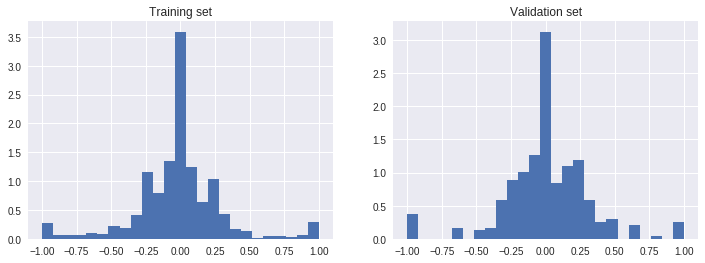

In [0]:
image_paths, steerings = get_only_center_image_and_steering_data(data)

#divide data into training and validation data
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)  #6 is the random seed value

print('Training Samples: {}\nValid Samples: {}'.format(len(X_train), len(X_valid)))

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(y_train, density=True, bins=25)
axes[0].set_title('Training set')

axes[1].hist(y_valid, density=True, bins=25)
axes[1].set_title('Validation set')

In [0]:
#X_train, X_valid till now only have image paths. Put exact image data in them
def get_original_image(imgName):
  original_image=mpimg.imread("track//IMG//"+imgName)
  return original_image

X_train=np.array(list(map(get_original_image, X_train)))
X_valid=np.array(list(map(get_original_image, X_valid)))

In [0]:
#zoom an image
def zoom(image3):
  zoom=iaa.Affine(scale=(1,1.3)) #Affine is used for Affine type operations like scaling, zooming
  #range is 1 to 1.3. means we want zoomin only. 1 is for original image
  image3=zoom.augment_image(image3)
  return image3  

In [0]:
#linear shift/translate an image(panning an image)
def pan_image(image3):
  pan1=iaa.Affine(translate_percent={"x":(-0.1,0.1), "y":(-0.1, 0.1)} ) #defines range from -0.1 to 0.1 %
  image3=pan1.augment_image(image3)
  return image3  

In [0]:
#change brightness in an image
def change_brightness(image3):
  brightness=iaa.Multiply((0.2, 1.2))
  image=brightness.augment_image(image3)
  return image3  

In [0]:
#flip an image. here we already have balanced data. so we dont actually need flipping operation
def flip_image(image3, steering_angle): 
  image3=cv2.flip(image3, 1)   #0 -vertical flip, 1- horizontal flip, -1- mixed fli
  steering_angle=-steering_angle
  return image3, steering_angle

In [0]:
#now we will apply these augmentations to our data. we will keep this random.
#as we dont want each augmentation to be applied to each input image

def random_augment(image3, steering_angle): 
  if np.random.rand() < 0.5:
    image3 = pan_image(image3)
  if np.random.rand() < 0.5:
    image3 = zoom(image3)
  if np.random.rand() < 0.5:
    image3 = change_brightness(image3)
  if np.random.rand() < 0.5:
    image3, steering_angle = flip_image(image3, steering_angle)
  return image3, steering_angle

In [0]:
# image preprocessing steps
def get_preprocessed_image(img1):
  img1=img1[60:135,:,:]
  img1=cv2.cvtColor(img1, cv2.COLOR_RGB2YUV)
  img1=cv2.GaussianBlur(img1, (3,3), 0)  # 3X3 is the Gaussian Blur kernel.. Gaussian blur helps us remove noise and smoothen image
  img1=cv2.resize(img1,(200, 66))
  img1=img1/255
  return img1

In [0]:
# Data augmentation
# we will not use the traditional ImageDataGenerator now. Since we want to have custom Data Augmentation

def batch_generator(image_paths, steering_ang, batch_size, istraining):
  
  while True:
    batch_img = []
    batch_steering = []
    
    for i in range(batch_size):
      random_index = random.randint(0, len(image_paths) - 1)
      
      if istraining:
        img2, steering = random_augment(image_paths[random_index], steering_ang[random_index])
     
      else:
        img2 = image_paths[random_index]
        steering = steering_ang[random_index]
      
      img2 = get_preprocessed_image(img2)
      batch_img.append(img2)
      batch_steering.append(steering)
    yield (np.asarray(batch_img), np.asarray(batch_steering))  #return the list and pause here
    
#NOTE: ImageDataGenerator never performed any data augmentation beforehanded, it will only do when some data is requested from it.
#This actually does not all load all the data into memory at one go and hence saving memory usage.
#to have same type of functioanliy here with our custom code we have used yield command.

In [0]:
def nvidia_model():
  model=Sequential()
  
  model.add(Convolution2D(24,5,5,subsample=(2,2), input_shape=(66,200,3), activation='elu'))
  #Convolution2D is same as Conv2D...subsample is same as stride..
  model.add(Convolution2D(36,5,5,subsample=(2,2), activation='elu'))
  model.add(Convolution2D(48,5,5,subsample=(2,2), activation='elu'))
  model.add(Convolution2D(64,3,3, activation='elu'))
  model.add(Convolution2D(64,3,3, activation='elu'))
  #model.add(Dropout(0.5))
  
  model.add(Flatten())
  
  model.add(Dense(100, activation='elu'))
  #model.add(Dropout(0.5))
  
  model.add(Dense(50, activation='elu'))
  model.add(Dense(10, activation='elu'))
  model.add(Dense(1))
 
  #Adam is the optimizer. and we are using categorical_crossentropy() for calculating loss here
  model.compile(Adam(lr=0.001),loss='mse', metrics=['accuracy'])
  
  return model

In [0]:
model=nvidia_model()
print(model.summary())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(24, (5, 5), input_shape=(66, 200, ..., activation="elu", strides=(2, 2))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(36, (5, 5), activation="elu", strides=(2, 2))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (5, 5), activation="elu", strides=(2, 2))`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="elu")`
  if __name__ == '__main__':


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 31, 98, 24)        1824      
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 14, 47, 36)        21636     
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 5, 22, 48)         43248     
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 3, 20, 64)         27712     
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 1, 18, 64)         36928     
_________________________________________________________________
flatten_8 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 100)               115300    
__________

Epoch 1/10
300/300 [==============================] - 91s 302ms/step - loss: 0.1266 - acc: 0.2431 - val_loss: 0.0685 - val_acc: 0.2262
Epoch 2/10
300/300 [==============================] - 87s 290ms/step - loss: 0.0610 - acc: 0.2566 - val_loss: 0.0599 - val_acc: 0.2280
Epoch 3/10
300/300 [==============================] - 85s 283ms/step - loss: 0.0550 - acc: 0.2633 - val_loss: 0.0564 - val_acc: 0.2370
Epoch 4/10
300/300 [==============================] - 84s 281ms/step - loss: 0.0443 - acc: 0.2724 - val_loss: 0.0390 - val_acc: 0.2530
Epoch 5/10
300/300 [==============================] - 86s 287ms/step - loss: 0.0386 - acc: 0.2776 - val_loss: 0.0369 - val_acc: 0.2630
Epoch 6/10
300/300 [==============================] - 84s 279ms/step - loss: 0.0353 - acc: 0.2766 - val_loss: 0.0327 - val_acc: 0.2603
Epoch 7/10
300/300 [==============================] - 82s 275ms/step - loss: 0.0330 - acc: 0.2849 - val_loss: 0.0332 - val_acc: 0.2594
Epoch 8/10
300/300 [==============================] - 8

Text(0.5, 0, 'epoch')

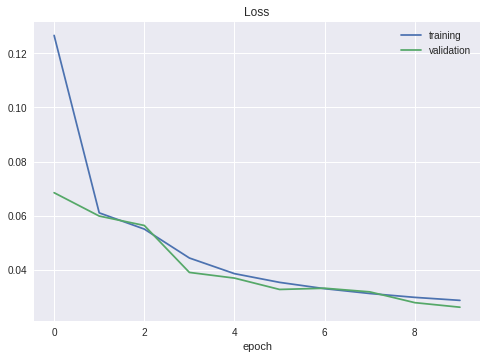

In [0]:
#training our model without data augmentation
#history=model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), batch_size=100, verbose=1, shuffle=1)

#training our model with data augmentation

#TRAINING---10 epochs, each epoch having 300 batches, each batch having 100 images
#VALIDATION---10 epochs, each epoch having 200 batches, each batch having 100 images
history = model.fit_generator(batch_generator(X_train, y_train, 100, 1),steps_per_epoch=300,epochs=10,validation_data=batch_generator(X_valid, y_valid, 100, 0),validation_steps=200, verbose=1, shuffle=1)

#history.history gives 4 things training_loss, training_accuracy, val_loss, val_accuracy
plt.plot(history.history['loss'])  #1 line
plt.plot(history.history['val_loss'])  #2 line
plt.legend(['training', 'validation']) #lables for 1,2 line
plt.title('Loss')
plt.xlabel('epoch')

In [0]:
#code for saving the complete model

model.save('model.h5')

from google.colab import files
files.download('model.h5')